<a href="https://colab.research.google.com/github/sitiaisyah14/pengujian_parameter/blob/main/iterasi_ke_1_dinamis_fiks_preprocessing_mlp_ag_alhamdulillah_berhasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer #untuk missing value
from sklearn.preprocessing import OneHotEncoder #untuk encoding input ke one hot encoding
from sklearn.compose import ColumnTransformer #untuk encoding input ke one hot encoding
from sklearn.preprocessing import MinMaxScaler #untuk normalisasi
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# **Import Data**

In [ ]:
import os;
os.remove('datacuaca.csv') if os.path.exists('datacuaca.csv') else None

from google.colab import files
uploaded = files.upload()

Saving datacuaca.csv to datacuaca.csv


In [ ]:
#Membaca Data

data_cuaca = pd.read_csv('datacuaca.csv', delimiter=';')
data_cuaca.head(5)

,Local time in Surabaya / Perak,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.10.2023 22:00,30.1,758.3,758.5,1.3,73.0,Wind blowing from the east-southeast,4.0,NaN,NaN,...,Altostratus translucidus.,"Cirrus fibratus, sometimes uncinus, not progre...",7.0,24.7,NaN,NaN,NaN,NaN,NaN,NaN
1,31.10.2023 19:00,30.8,757.0,757.3,2.3,68.0,Wind blowing from the south-southeast,6.0,NaN,NaN,...,Altostratus opacus or Nimbostratus.,"Cirrus fibratus, sometimes uncinus, not progre...",8.0,24.3,NaN,NaN,NaN,NaN,NaN,NaN
2,31.10.2023 16:00,33.7,754.7,755.0,-1.4,54.0,Wind blowing from the south-east,5.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",12.0,23.2,NaN,NaN,NaN,NaN,NaN,NaN
3,31.10.2023 13:00,36.0,756.1,756.4,-2.2,47.0,Wind blowing from the east-southeast,4.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",12.0,22.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.10.2023 10:00,33.2,758.3,758.6,0.0,61.0,Wind blowing from the south-east,4.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",12.0,24.6,NaN,NaN,NaN,NaN,NaN,NaN


# **Fungsi Preprocessing**
*   Missing Value
*   Encoding
*   Normalisasi

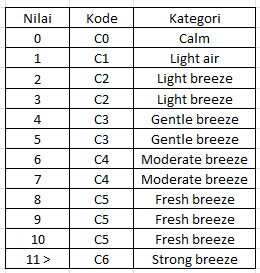





In [ ]:
def encoding_ff(df):
  Ff_encoder = {
    0: 0,
    1: 1,
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 4,
    7: 4,
    8: 5,
    9: 5,
    10: 5
  }
  # Melakukan mapping pada kolom Ff
  # Menambahkan aturan untuk nilai lebih dari 10.0
  df['Ff'] = df['Ff'].apply(lambda x: Ff_encoder[x] if x in Ff_encoder else 6)
  return df

In [ ]:
def preprocessing_data(df):
  #menghapus prameter yang datanya tidak lengkap
  drop_fitur_null = ["Local time in Surabaya / Perak", 'ff10', 'ff3', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'RRR', 'tR', 'E', 'Tg', "E'", 'sss']
  df = df.drop(columns=drop_fitur_null)

  #proses Missing Value Kolom Angka
  kolom_angka = ['T', 'Po', 'P', 'Pa', 'U', 'Td',  'Ff']
  imputer_angka = KNNImputer(n_neighbors=5)
  df[kolom_angka] = imputer_angka.fit_transform(df[kolom_angka])

  #Proses Missing Value Kolom Kategorikal
  kolom_kategori = ['DD', 'N', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV']
  imputer_kategori = KNNImputer(n_neighbors=5)
  for kolom in kolom_kategori:
    df[kolom] = df[kolom].astype('category')  # Ubah kolom kategorikal menjadi tipe kategori
    df[kolom] = df[kolom].cat.codes  # Konversi kategori menjadi kode numerik

  imputer_kategori = KNNImputer(n_neighbors=5)
  df[kolom_kategori] = imputer_kategori.fit_transform(df[kolom_kategori])


  #proses encoding untuk data kategori
  # Membuat objek OneHotEncoder
  encoder = OneHotEncoder(sparse=False, drop='first')
  # Membuat transformer untuk mengaplikasikan one-hot encoding pada kolom kategorikal tertentu
  transformer = ColumnTransformer(transformers=[('onehot', encoder, kolom_kategori)], remainder='passthrough')
  # Melakukan transformasi pada DataFrame
  df_encoded = transformer.fit_transform(df)

  #proses encoding kolom Ff
  encoding_ff(df)

  #proses normalisasi data
  scaler = MinMaxScaler()
  # Menentukan kolom yang akan dinormalisasi (kecuali 'Ff')
  cols_to_normalize = df.columns.difference(['Ff'])
  # Melakukan normalisasi hanya pada kolom yang ditentukan
  df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

  #duplikat data menjadi csv
  df = df.drop_duplicates()
  df.to_csv('datacuaca.csv', index=False)
  return df

data_cuaca = preprocessing_data(data_cuaca)
data_cuaca.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,T,Po,P,Pa,U,DD,Ff,N,Cl,Nh,H,Cm,Ch,VV,Td
0,0.537879,0.425806,0.613208,0.567416,0.600000,0.235294,3,0.750,0.4,0.555556,0.875,0.8,0.6,0.8125,0.771930
1,0.590909,0.341935,0.500000,0.623596,0.523077,0.705882,4,0.750,0.5,0.444444,0.875,0.7,0.6,0.8750,0.736842
2,0.810606,0.193548,0.283019,0.415730,0.307692,0.647059,3,0.375,0.5,0.333333,0.875,0.4,0.6,0.5000,0.640351
3,0.984848,0.283871,0.415094,0.370787,0.200000,0.235294,3,0.000,0.5,0.111111,0.875,0.9,0.6,0.5000,0.614035
4,0.772727,0.425806,0.622642,0.494382,0.415385,0.647059,3,0.250,0.6,1.000000,0.500,0.9,0.6,0.5000,0.763158


# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def training_testing (data):
    # Spliting data into Feature and Target
    X = data.drop('Ff', axis=1)  # data training kecuali kolom Ff
    y = data['Ff']

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

    print("Jumlah data dalam X_train:", len(X_train))
    print("Jumlah data dalam X_test:", len(X_test))
    # print("Jumlah kelas:", num_classes)


    return X_train, X_test, y_train, y_test

# Panggil fungsi dengan data_cuaca Anda
X_train, X_test, y_train, y_test = training_testing(data_cuaca)

Jumlah data dalam X_train: 5754
Jumlah data dalam X_test: 2467


In [ ]:
# Sebelum memanggil fungsi training_testing
unique_classes = np.unique(data_cuaca['Ff'])
num_classes = len(unique_classes)
print("Jumlah kelas setelah normalisasi:", unique_classes)
print("Jumlah kelas setelah normalisasi:", num_classes)

Jumlah kelas setelah normalisasi: [0 1 2 3 4 5 6]
Jumlah kelas setelah normalisasi: 7


In [ ]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [0 1 2 3 4 5 6]
Unique values in y_test: [0 1 2 3 4 5 6]


# **Algoritma Genetika dan Fungsi Fitness MLP**

## **Kekurangan**
- Penyesuaian proses sesuai fitur yang terpilih `calculate_fitness` dan `top_feature`
- Perlu dicoba menggunakan epoch yang lebih tinggi
- Mempelajari terkait `One_Hot_Encoding` setelah fungsi softmax
- mencetak offspring hasil crossover dan mutasi

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
import random
import statistics
from keras import initializers
import math
from tqdm import tqdm

In [ ]:
def calculate_fitness(X_train, X_test, y_train, y_test):
    #Define custom initializers for weights and biases
    custom_weight_initializer = initializers.RandomUniform(minval=0, maxval=1)
    custom_bias_initializer = initializers.Zeros

    # Convert target to one-hot encoding
    y_train_one_hot = to_categorical(y_train, num_classes=7)
    y_test_one_hot = to_categorical(y_test, num_classes=7)

    # Create a Sequential model
    model = Sequential()
    # Add a sigmoid input layer
    model.add(Dense(6, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer=custom_weight_initializer, bias_initializer=custom_bias_initializer))
    # Add a softmax output layer
    model.add(Dense(7, activation='softmax', kernel_initializer=custom_weight_initializer, bias_initializer=custom_bias_initializer))
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model.fit(X_train, y_train_one_hot, epochs=50, batch_size=128, validation_data=(X_test, y_test_one_hot), verbose=0)


    # Prediksi menggunakan model
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    # Konversi label kembali ke format integer
    y_test_int = np.argmax(y_test_one_hot, axis=1)

    # Hitung f1_score
    f1 = f1_score(y_test_int, y_pred, average='weighted')
    #print('F1-Score:', f1)
    return f1

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="The initializer RandomUniform is unseeded and being called multiple times")


In [ ]:
def init_population(n,c):
    return np.array([[math.ceil(e) for e in pop] for pop in (np.random.rand(n,c)-0.5)]), np.zeros((2,c))-1

def single_point_crossover(population, crossover_probability):
    r, c = population.shape[0], population.shape[1]
    num_crossovers = math.ceil(crossover_probability * r)  # Menentukan berapa banyak operasi crossover yang akan dilakukan
    print('Jumlah Crossover', num_crossovers)
    offspring_list = []
    for idx in range(num_crossovers):
        i, j = np.random.choice(r, size=2, replace=False)  # Memilih dua indeks individu acak untuk crossover
        n = np.random.randint(1, c)  # Memilih titik crossover acak
        offspring = np.append(population[i][:n], population[j][n:])
        offspring_list.append(offspring)
        # Print hasil offspring setiap crossover
        # print(f"Crossover: {idx+1}")
        # print(f"Offspring: {offspring_list[idx]}")
    return np.array(offspring_list)


def flip_mutation(population, mutation_probability):
    r, c = population.shape[0], population.shape[1]
    num_mutations = math.ceil(mutation_probability * r )
    print('Jumlah Mutations : ', num_mutations)
    offspring_list = []
    for idx in range(num_mutations):
        i, j = np.random.randint(r), np.random.randint(c)  # Memilih indeks individu dan gen acak untuk mutasi
        offspring = population[i].copy()
        offspring[j] = 1 - offspring[j]  # Flip mutation
        offspring_list.append(offspring)
        # Print hasil offspring setiap mutation
        # print(f"Mutation: {idx+1}")
        # print(f"Offspring: {offspring_list[idx]}")
    return np.array(offspring_list)

def elitism_selection(population, offspring, fitness, offspring_fitness, elite_size):
    # Gabungkan populasi awal, offspring crossover, dan offspring mutasi
    total_population = np.vstack((population, offspring))
    total_fitness = np.concatenate((fitness, offspring_fitness))

    # Mengurutkan total populasi berdasarkan total fitness, dari yang terbesar ke yang terkecil
    sorted_indices = np.argsort(total_fitness)[::-1]


    # Memilih elite_size individu terbaik dari total populasi yang telah diurutkan
    elite_population = total_population[sorted_indices[:elite_size], :].copy()
    elite_fitness = total_fitness[sorted_indices[:elite_size]]  # Memastikan fitness sesuai dengan populasi elit

    # print("Populasi Baru :")
    # for i, indv in enumerate(elite_population):
    #     print("[{}] | Fitness: {}".format(' '.join(map(str, indv)), elite_fitness[i]))

    return elite_population, elite_fitness

def get_fitness(data, feature_list, target, population):
    fitness = []
    for i in range(population.shape[0]):
        columns = [feature_list[j] for j in range(population.shape[1]) if population[i,j]==1]
        fitness.append(calculate_fitness(X_train, X_test, y_train, y_test))
    return fitness

In [ ]:
def ga(data, feature_list, target, n, max_iter, crossover_probability, mutation_probability):
    c = len(feature_list)
    population, memory = init_population(n, c)
    fitness = get_fitness(data, feature_list, target, population)
    optimal_solution = population[np.argmax(fitness)]  # Mengambil solusi terbaik dari populasi awal
    optimal_value = max(fitness)  # Mengambil nilai fitness terbaik dari populasi awal

    print("Inisialisasi Populasi:")
    for i in range(len(population)):
          print(population[i], "| Fitness:", fitness[i])


    for i in tqdm(range(max_iter)):
        print("\n                        Iteration:", i+1)

        print("======================= Hasil Offspring Crossover ======================")
        offspring_crossover = single_point_crossover(population, crossover_probability)
        offspring_crossover_fitness = get_fitness(data, feature_list, target, offspring_crossover)
        for i in range(len(offspring_crossover)):
          print("Crossover:", i+1)
          print("Offspring:", offspring_crossover[i], "| Fitness:", offspring_crossover_fitness[i])


        print("======================== Hasil Offspring Mutasi =========================")
        offspring_mutation = flip_mutation(population, mutation_probability)
        offspring_mutation_fitness = get_fitness(data, feature_list, target, offspring_mutation)
        for i in range(len(offspring_mutation)):
          print("\nMutasi:", i+1)
          print("Offspring:", offspring_mutation[i], "| Fitness:", offspring_mutation_fitness[i])

        # Gabungkan offspring dari crossover dan mutasi
        offspring = np.vstack((offspring_crossover, offspring_mutation))
        offspring_fitness = np.concatenate((offspring_crossover_fitness, offspring_mutation_fitness))

        print("======================== Hasil Seleksi =========================")
        elite_population, elite_fitness = elitism_selection(population, offspring, fitness, offspring_fitness, n)

        # Update populasi dan fitness dengan populasi elit yang baru dipilih
        population = elite_population
        fitness = elite_fitness

        # Cetak hasil seleksi elitisme
        print("Populasi Baru Setelah Seleksi Elitisme:")
        for i, indv in enumerate(elite_population):
            print("[{}] | Fitness: {}".format(' '.join(map(str, indv)), elite_fitness[i]))


        # Memperbarui nilai optimal jika ditemukan solusi yang lebih baik dari populasi elit
        if max(fitness) > optimal_value:
            optimal_value = max(fitness)
            optimal_solution = population[np.argmax(fitness)]  # Mengambil solusi terbaik dari populasi baru setelah seleksi elitisme

        # Mencetak nilai dan solusi optimal terakhir yang diperbarui (berdasarkan populasi baru jika ada perubahan)
        print("\nOptimal Value:", optimal_value)
        print("Optimal Solution:", optimal_solution)

        # Mencetak nilai maksimum fitness dan solusi terbaik dari populasi baru pada iterasi tertentu.
        # print("\nOptimal Value:", max(fitness_new))  # Memperbarui optimal value dengan nilai maksimum fitness baru
        # print("Optimal Solution:", population_new[np.argmax(fitness_new)])  # Memperbarui optimal solution dari populasi baru

    return optimal_solution, optimal_value


In [ ]:

# Execute Genetic Algorithm to obtain Important Feature
target = ['Ff']
feature_list = [i for i in data_cuaca.columns if i not in target]

feature_set, acc_score = ga(data_cuaca, feature_list, target, 5, 100, crossover_probability=0.7, mutation_probability=0.3)
print("Fitur Set Terpilih", feature_set)
# Filter Selected Features
selected_indices = [i for i, val in enumerate(feature_set) if val == 1]
selected_features = [feature_list[i] for i in selected_indices]

# Print List of Features
print('Optimal Feature Set\n', selected_features, '\nOptimal Accuracy =', round(acc_score * 100), '%')


78/78 [==============================] - 0s 1ms/step
Inisialisasi Populasi:
[1 0 0 1 1 0 1 0 1 1 0 0 0 0] | Fitness: 0.45405239133189185
[0 0 0 1 1 0 0 1 1 1 1 1 1 1] | Fitness: 0.44657126402503844
[0 0 1 1 0 1 1 1 1 1 1 0 0 1] | Fitness: 0.46442195016474025
[0 1 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.5141729585287736
[1 1 0 1 1 1 1 1 1 0 1 0 0 0] | Fitness: 0.4610876679415126


  0%|          | 0/100 [00:00<?, ?it/s]


                        Iteration: 1
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 1 0 1 1 0 1 1 0] | Fitness: 0.4356759149467889
Crossover: 2
Offspring: [1 0 0 1 0 1 1 1 1 1 1 0 0 1] | Fitness: 0.44761397642671913
Crossover: 3
Offspring: [0 1 0 1 1 1 1 1 1 0 1 0 0 0] | Fitness: 0.44216549811038797
Crossover: 4
Offspring: [1 0 0 1 1 0 1 0 1 0 1 0 0 0] | Fitness: 0.45403690375683037
======================== Hasil Offspring Mutasi =========================
Jumlah Mutations :  2
78/78 [==============================] - 0s 1ms/step


  1%|          | 1/100 [01:00<1:39:34, 60.35s/it]


Mutasi: 1
Offspring: [0 0 0 1 1 0 0 1 1 1 1 1 0 1] | Fitness: 0.4606147899971323

Mutasi: 2
Offspring: [0 0 1 1 0 1 0 1 1 1 1 0 0 1] | Fitness: 0.4188895812229998
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[0 1 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.5141729585287736
[0 0 1 1 0 1 1 1 1 1 1 0 0 1] | Fitness: 0.46442195016474025
[1 1 0 1 1 1 1 1 1 0 1 0 0 0] | Fitness: 0.4610876679415126
[0 0 0 1 1 0 0 1 1 1 1 1 0 1] | Fitness: 0.4606147899971323
[1 0 0 1 1 0 1 0 1 1 0 0 0 0] | Fitness: 0.45405239133189185

Optimal Value: 0.5141729585287736
Optimal Solution: [0 1 0 0 1 1 0 0 1 1 0 1 1 0]

                        Iteration: 2
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 1 1 1 0 1] | Fitness: 0.4617266660827402
Crossover: 2
Offspring: [1 1 0 1 1 1 1 1 1 1 1 0 0 1] | Fitness: 0.465574653760

  2%|▏         | 2/100 [02:14<1:52:12, 68.70s/it]


Mutasi: 1
Offspring: [0 0 0 1 1 0 0 1 1 1 1 1 0 0] | Fitness: 0.4396337820857015

Mutasi: 2
Offspring: [1 1 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.49874005706091507
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[0 1 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.5141729585287736
[1 1 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.49874005706091507
[0 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4664725296288752
[1 1 0 1 1 1 1 1 1 1 1 0 0 1] | Fitness: 0.46557465376086615
[0 1 0 0 1 1 0 0 1 1 1 0 0 0] | Fitness: 0.46508807064145

Optimal Value: 0.5141729585287736
Optimal Solution: [0 1 0 0 1 1 0 0 1 1 0 1 1 0]

                        Iteration: 3
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 0 1 1 0 0 1 1 1 1 0 0 1] | Fitness: 0.4516447047726812
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327

  3%|▎         | 3/100 [03:10<1:41:42, 62.91s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4622202483468144

Mutasi: 2
Offspring: [0 0 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.49399205288707493
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[0 1 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.5141729585287736
[1 1 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.49874005706091507
[0 0 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.49399205288707493
[0 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46847215328543523

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 4
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4644587473891978
Crossover: 2
Offspring: [1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5022522130

  4%|▍         | 4/100 [04:06<1:35:49, 59.89s/it]


Mutasi: 1
Offspring: [0 0 0 1 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.45757867607074637

Mutasi: 2
Offspring: [0 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4617122204929327
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195357681639629
[0 1 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.5141729585287736
[1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5022522130621793
[1 1 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.49874005706091507

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 5
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 1 1 1 1 0 1 0 0 1 1 0] | Fitness: 0.4499733568593724
Crossover: 2
Offspring: [1 0 0 1 1 1 1 0 1 1 0 1 1 0] | Fitness: 0.465746013172

  5%|▌         | 5/100 [05:01<1:32:17, 58.29s/it]


Offspring: [0 1 0 0 1 1 1 0 1 1 0 1 1 0] | Fitness: 0.4517704154957704

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195664730655456
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195664730655456
[1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195357681639629
[0 1 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.5141729585287736
[1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5022522130621793

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 6
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.46648449316681195
Crossover: 2
Offspring: [1 0 0 1 1 1 1 0 1 1 0 1 1 0] | Fitness: 0.512716206972051
Crossov

  6%|▌         | 6/100 [06:02<1:32:39, 59.14s/it]


Mutasi: 1
Offspring: [1 0 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.49098773885006725

Mutasi: 2
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5204352061550239
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5204352061550239
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195664730655456
[1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195357681639629
[0 1 0 0 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.5141729585287736

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 7
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 1 0 0 1 1 0 0 1 1 0 1 0 0] | Fitness: 0.5197578679478477
Crossover: 2
Offspring: [1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4597683800721

  7%|▋         | 7/100 [07:05<1:33:53, 60.58s/it]


Mutasi: 1
Offspring: [0 1 0 1 1 1 0 0 1 1 0 1 1 0] | Fitness: 0.4710409087769521

Mutasi: 2
Offspring: [0 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4638548723934355
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5204352061550239
[0 1 0 0 1 1 0 0 1 1 0 1 0 0] | Fitness: 0.5197578679478477
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195664730655456
[1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195357681639629

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 8
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4710712990148347
Crossover: 2
Offspring: [1 0 0 1 1 0 1 0 1 0 1 0 0 0] | Fitness: 0.50162561843088

  8%|▊         | 8/100 [08:06<1:32:41, 60.46s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.46110395009232175

Mutasi: 2
Offspring: [1 0 0 1 0 1 1 0 1 0 1 0 0 0] | Fitness: 0.4666866621188058
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5247517329661855
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5204352061550239
[0 1 0 0 1 1 0 0 1 1 0 1 0 0] | Fitness: 0.5197578679478477
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195664730655456

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 9
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46334998012304685
Crossover: 2
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.468109278828

  9%|▉         | 9/100 [09:02<1:29:31, 59.03s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 0 0 0 0 1 0 0 0] | Fitness: 0.4428290762226572

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 1 0 0] | Fitness: 0.46703647999618514
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5247517329661855
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5204352061550239
[0 1 0 0 1 1 0 0 1 1 0 1 0 0] | Fitness: 0.5197578679478477
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5195664730655456

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 10
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
Crossover: 2
Offspring: [1 0 0 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.466367186857

 10%|█         | 10/100 [10:03<1:29:27, 59.64s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 1 1 1 0 1 0 0 0] | Fitness: 0.45880353150375175

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 1] | Fitness: 0.4501003718309886
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5247517329661855
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5204352061550239
[0 1 0 0 1 1 0 0 1 1 0 1 0 0] | Fitness: 0.5197578679478477

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 11
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5150207927868163
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.521884541254

 11%|█         | 11/100 [10:57<1:26:12, 58.12s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 0 0 1 0 0 0] | Fitness: 0.4679696961916902

Mutasi: 2
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46727454221019543
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5247517329661855
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5218845412541838
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5204352061550239

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 12
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4874053773249653
Crossover: 2
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780

 12%|█▏        | 12/100 [11:55<1:25:17, 58.15s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 1 0 0] | Fitness: 0.45328860185311026

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.46880560393425297
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5247517329661855
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5218845412541838

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 13
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 4ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4622956809588252
Crossover: 2
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.450437815314

 13%|█▎        | 13/100 [13:02<1:28:05, 60.75s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.525001429448657

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.4544550380676604
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.525001429448657
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5247517329661855

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 14
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.5180559483350157
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.4485692992300712

 14%|█▍        | 14/100 [14:06<1:28:13, 61.56s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 0 1 0 0] | Fitness: 0.4624066239069646

Mutasi: 2
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4800722937982928
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.525001429448657

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 15
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4581262454913966
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.436840229368218

 15%|█▌        | 15/100 [15:05<1:26:10, 60.84s/it]


Mutasi: 1
Offspring: [1 0 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.45654736491786585

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 0 0 0 0] | Fitness: 0.4873863581059395
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.525001429448657

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 16
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4682717861457643
Crossover: 2
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.44677563899708

 16%|█▌        | 16/100 [16:09<1:26:33, 61.83s/it]

 1
Offspring: [1 0 0 1 1 0 0 0 1 0 0 0 0 0] | Fitness: 0.4950838303275669

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5171110262659053
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.525001429448657

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 17
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5205914273028949
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5163372995360743
Crosso

 17%|█▋        | 17/100 [17:05<1:23:00, 60.00s/it]


Mutasi: 1
Offspring: [1 0 0 1 0 0 0 1 1 0 0 0 0 0] | Fitness: 0.46392199075545126

Mutasi: 2
Offspring: [1 0 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.520714108539824
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.525001429448657

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 18
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46431548295849173
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46415903735164

 18%|█▊        | 18/100 [18:04<1:21:37, 59.73s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 1 1 1 0 1 0 0 0] | Fitness: 0.47390090779872956

Mutasi: 2
Offspring: [1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5259795193801972
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5259795193801972

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 19
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.497059100929602
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.43638603667985

 19%|█▉        | 19/100 [18:55<1:17:22, 57.31s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 1 0 1 1 0 1 0 1 0] | Fitness: 0.48343346239633245

Mutasi: 2
Offspring: [1 0 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.48364919614861224
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5259795193801972

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 20
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4949519341849483
Crossover: 2
Offspring: [1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.528192216221

 20%|██        | 20/100 [19:50<1:15:29, 56.62s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.465032716327567

Mutasi: 2
Offspring: [1 0 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5048954253387014
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5281922162219099

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 21
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.49212645763169
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4690851641307153


 21%|██        | 21/100 [20:49<1:15:17, 57.19s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.4705168715931713

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 0 0 1 0 0 0] | Fitness: 0.4681475575699799
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5281922162219099

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 22
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44807476597455453
Crossover: 2
Offspring: [1 1 0 1 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.4733631411072

 22%|██▏       | 22/100 [21:50<1:16:01, 58.49s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 0 0 1 0 0 0] | Fitness: 0.4602591328066548

Mutasi: 2
Offspring: [1 1 1 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5149711350610943
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5281922162219099

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 23
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44683790848569616
Crossover: 2
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.4611784368329

 23%|██▎       | 23/100 [22:55<1:17:26, 60.34s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 1] | Fitness: 0.45793006930471936

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.4630460733979636
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5281922162219099

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 24
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45778480805221805
Crossover: 2
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.517909214215

 24%|██▍       | 24/100 [23:51<1:14:38, 58.92s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 0 0 1 0 0 0] | Fitness: 0.4587567881994738

Mutasi: 2
Offspring: [1 0 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.46041975987162437
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5281922162219099

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 25
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4586393861256688
Crossover: 2
Offspring: [1 0 0 1 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.5012959707215

 25%|██▌       | 25/100 [24:47<1:12:33, 58.05s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.49882826425669974

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 1 0 0] | Fitness: 0.5178104434812187
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593
[1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5281922162219099

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 26
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5105233713286983
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4612718935305

 26%|██▌       | 26/100 [25:39<1:09:25, 56.30s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Mutasi: 2
Offspring: [1 1 0 1 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.4630843584596789
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 27
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.482127919765148
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.436334963424896

 27%|██▋       | 27/100 [26:37<1:09:13, 56.90s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45469816279723624

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 1] | Fitness: 0.45505176606460446
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652
[1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.528292048780593

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 28
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46095548134509534
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45970897726

 28%|██▊       | 28/100 [27:36<1:08:47, 57.32s/it]

Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 29
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4518321162238405
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.47439850763093094
Crossover: 3
Offspring: [1 1 0 0 1 1 1 1 1 0 1 0 0 0] | Fitness: 0.503558212866119
Crossover: 4
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.49467583321409353
======================== Hasil Offspring Mutasi =========================
Jumlah Mutations :  2
78/78 [==============================] - 0s 2ms/step


 29%|██▉       | 29/100 [28:35<1:08:43, 58.07s/it]


Mutasi: 1
Offspring: [1 1 1 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4861778640558

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4665969055482692
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 30
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4799455420739274
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5071716653196826
C

 30%|███       | 30/100 [29:39<1:09:39, 59.71s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.5012169864892845

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 1] | Fitness: 0.4553654798410464
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 31
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4783767143783704
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.451746000958952

 31%|███       | 31/100 [30:38<1:08:20, 59.43s/it]


Mutasi: 1
Offspring: [0 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.49218487319242443

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 1] | Fitness: 0.47147769245318516
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 32
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44986335496864954
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.473599903163

 32%|███▏      | 32/100 [31:33<1:05:50, 58.10s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4658264973309545

Mutasi: 2
Offspring: [1 0 0 1 1 0 1 1 1 0 1 0 0 0] | Fitness: 0.4600022971674077
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 33
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.50980427304857
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5227942793350836


 33%|███▎      | 33/100 [32:34<1:05:50, 58.96s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44498505809814887

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 1] | Fitness: 0.46381227155518945
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 34
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4527256377310417
Crossover: 2
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4566168342003

 34%|███▍      | 34/100 [33:29<1:03:36, 57.83s/it]


Mutasi: 1
Offspring: [1 0 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44976941642756274

Mutasi: 2
Offspring: [0 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5130218156829718
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 35
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 1 1 0 1 0 0 0] | Fitness: 0.4559490529291797
Crossover: 2
Offspring: [1 1 0 0 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.46705228317661

 35%|███▌      | 35/100 [34:32<1:04:23, 59.44s/it]


Mutasi: 1
Offspring: [1 0 0 1 0 0 0 1 1 0 1 0 0 0] | Fitness: 0.45056944563007856

Mutasi: 2
Offspring: [1 0 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.45478398494258826
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 36
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44481053919204355
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.460248605954

 36%|███▌      | 36/100 [35:31<1:03:09, 59.20s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 0 0 0 0 1 0 0 0] | Fitness: 0.45514624616454596

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.5267659546178631
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 37
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4654422527806431
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.45776041931924

 37%|███▋      | 37/100 [36:38<1:04:45, 61.67s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 1 1 0 0 0] | Fitness: 0.46874278103415323

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 1] | Fitness: 0.4614276344766859
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 38
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.451175665725118
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.457542154431810

 38%|███▊      | 38/100 [37:38<1:03:16, 61.24s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 1 1 1 0 1 0 0 0] | Fitness: 0.4568267808559539

Mutasi: 2
Offspring: [1 0 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.4759852906548569
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 39
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46110171371649233
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45559988481811

 39%|███▉      | 39/100 [38:36<1:01:00, 60.01s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.45483642931707

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 1 0 1 1 0 0] | Fitness: 0.45507403238665733
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 40
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46727952461982925
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.461344543228425

 40%|████      | 40/100 [39:35<59:47, 59.79s/it]  


Mutasi: 1
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4663745249586654

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.442997536916657
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 41
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.45861931540824474
Crossover: 2
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.477199876295108

 41%|████      | 41/100 [40:34<58:31, 59.51s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.46457847974493727

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 1 1 0 0 0] | Fitness: 0.47219259949049336
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 42
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4519783492228457
Crossover: 2
Offspring: [1 1 0 0 1 1 1 1 1 0 1 0 0 0] | Fitness: 0.4588106482563

 42%|████▏     | 42/100 [41:24<54:44, 56.63s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.5029395086821613

Mutasi: 2
Offspring: [1 0 1 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5090993196385271
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 43
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 1 1 0 1 0 0 0] | Fitness: 0.4703170134498152
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.454652964639462

 43%|████▎     | 43/100 [42:22<54:13, 57.08s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 0 0 0 0] | Fitness: 0.4583959741947945

Mutasi: 2
Offspring: [1 1 0 0 0 1 1 0 1 0 1 0 0 0] | Fitness: 0.5105843655499107
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 44
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4621964296687249
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.519196273807185

 44%|████▍     | 44/100 [43:17<52:47, 56.56s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 0 0 1 0 1 0 0 0] | Fitness: 0.4695494789241397

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4574209288460247
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 45
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 0 0] | Fitness: 0.46729138257632563
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.47373245984800

 45%|████▌     | 45/100 [44:10<50:48, 55.43s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.4582940368328755

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 1] | Fitness: 0.4495674075786318
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 46
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4935053415017377
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.527876594898662

 46%|████▌     | 46/100 [45:09<50:55, 56.58s/it]


Mutasi: 1
Offspring: [1 0 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4342294457700226

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 1 1 0 0 0] | Fitness: 0.45606474399064634
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 47
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45785732965466736
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4631417553550

 47%|████▋     | 47/100 [46:08<50:37, 57.31s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.45253373304599126

Mutasi: 2
Offspring: [1 1 1 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5161619622602952
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 48
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4571596258177897
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46544959370878

 48%|████▊     | 48/100 [47:08<50:15, 58.00s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.453600332943965

Mutasi: 2
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4535983528198966
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 49
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5095920683489878
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5071775803500949

 49%|████▉     | 49/100 [48:10<50:18, 59.19s/it]


Mutasi: 1
Offspring: [1 0 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4642494865968672

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 0 0 0 0] | Fitness: 0.45664706407561756
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 50
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4848679180630313
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46459953847040

 50%|█████     | 50/100 [49:09<49:23, 59.27s/it]


Mutasi: 1
Offspring: [1 0 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4601731777482023

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 0 0 1 0 0 0] | Fitness: 0.44871227773558864
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 51
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4409688325964991
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.50725613910709

 51%|█████     | 51/100 [50:05<47:31, 58.20s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 1 0 0] | Fitness: 0.5103456748096658

Mutasi: 2
Offspring: [1 0 1 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5121340793605605
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5306299985545652

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 52
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4926195773748731
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.463900879685177

 52%|█████▏    | 52/100 [51:04<46:42, 58.39s/it]


Mutasi: 1
Offspring: [0 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.4534683607395658

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 1] | Fitness: 0.447211681091022
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 53
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.44330684791573405
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.462673691299541

 53%|█████▎    | 53/100 [52:05<46:26, 59.29s/it]


Mutasi: 1
Offspring: [1 0 0 1 0 0 0 1 1 0 1 0 0 0] | Fitness: 0.5255686946200886

Mutasi: 2
Offspring: [1 1 1 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.48530525223738213
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 54
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4591510835488992
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45301073923802

 54%|█████▍    | 54/100 [53:01<44:47, 58.41s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 1 0 0] | Fitness: 0.47480198147049485

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 1 1 0 0 0] | Fitness: 0.4647374565424996
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 55
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4593192067100261
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45096143824282

 55%|█████▌    | 55/100 [54:00<43:55, 58.56s/it]

 1
Offspring: [1 1 0 0 1 1 1 0 1 0 0 0 0 0] | Fitness: 0.5100046107979307

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 1 0 0] | Fitness: 0.4692237268842296
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 56
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46438376302332485
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5176423946565283
Cross

 56%|█████▌    | 56/100 [55:06<44:26, 60.60s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 0 0 0 0] | Fitness: 0.4463741114483075

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45884901540409473
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 57
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.45603820315404064
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4658911781076

 57%|█████▋    | 57/100 [56:05<43:02, 60.06s/it]


Mutasi: 1
Offspring: [1 0 0 0 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46914715218106623

Mutasi: 2
Offspring: [0 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44049428796109485
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 58
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.48564054854583955
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.460596538291

 58%|█████▊    | 58/100 [57:01<41:12, 58.86s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 1 0 0] | Fitness: 0.47001773330854113

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.46955824860923745
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965
[1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5315763284274609

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 59
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4568955950027418
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967

 59%|█████▉    | 59/100 [58:06<41:30, 60.74s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.4902513829898035

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 0 0 0 0] | Fitness: 0.45601730111969957
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 60
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.522183919353334
Crossover: 2
Offspring: [1 0 0 1 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.462966753875880

 60%|██████    | 60/100 [59:03<39:51, 59.78s/it]

 1
Offspring: [1 0 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.4762757378997122

Mutasi: 2
Offspring: [1 1 0 1 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4737768849836993
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 61
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46172810319397306
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.46119671541314644
Cros

 61%|██████    | 61/100 [1:00:03<38:51, 59.78s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 1] | Fitness: 0.4954045788999943

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.467877195147936
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 62
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4642975214130697
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4456851436352787

 62%|██████▏   | 62/100 [1:01:05<38:11, 60.31s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.4651132937727835

Mutasi: 2
Offspring: [0 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4981076548533639
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 63
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 1 0 0 0 1 0 0 0] | Fitness: 0.446388799082792
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4947735812370130

 63%|██████▎   | 63/100 [1:02:04<37:02, 60.06s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 1 0 1 0 1 0 0 0] | Fitness: 0.47277014405361084

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.47844463570984513
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 64
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.49268533559681255
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.453888661428

 64%|██████▍   | 64/100 [1:03:04<35:56, 59.90s/it]


Mutasi: 1
Offspring: [1 0 0 1 0 0 0 0 1 0 1 0 0 0] | Fitness: 0.4629301846366649

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46209608593391105
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 65
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46436995891305344
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4633737337596

 65%|██████▌   | 65/100 [1:04:04<34:59, 59.98s/it]


Mutasi: 1
Offspring: [1 1 0 0 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.5100031287079891

Mutasi: 2
Offspring: [1 1 0 0 1 0 1 0 0 0 1 0 0 0] | Fitness: 0.4679477034454406
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 66
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46450895253643515
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46928787270444

 66%|██████▌   | 66/100 [1:05:03<33:52, 59.79s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 1 0 0 1 0 0 0] | Fitness: 0.4675751155428425

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 1 0 0 1 0 0 0] | Fitness: 0.47363858524330693
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 67
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.48276555431517515
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4532061307663

 67%|██████▋   | 67/100 [1:06:05<33:12, 60.37s/it]


Mutasi: 1
Offspring: [0 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5019112070226386

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 0 0 0 0] | Fitness: 0.48695811529674093
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 68
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4902767874012249
Crossover: 2
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.47530189274584

 68%|██████▊   | 68/100 [1:07:07<32:26, 60.84s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 0 1 0 0 0 1 0 0 0] | Fitness: 0.4931160967239166

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5319640194401257
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 69
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4820915280975182
Crossover: 2
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.469770294040869

 69%|██████▉   | 69/100 [1:08:06<31:11, 60.37s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 1 1 1 0 0 0] | Fitness: 0.5206460190289476

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 0 0] | Fitness: 0.4650429554006434
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 70
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5161538982798329
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.459566996515572

 70%|███████   | 70/100 [1:09:07<30:19, 60.64s/it]


Mutasi: 1
Offspring: [1 0 0 1 0 0 0 0 1 0 1 0 0 0] | Fitness: 0.46183757691870847

Mutasi: 2
Offspring: [1 1 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4677489125286861
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 71
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.44650988966304916
Crossover: 2
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4574568108540

 71%|███████   | 71/100 [1:10:11<29:45, 61.56s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 1 0 1 0 1 0 0 0] | Fitness: 0.4562868320591591

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.45185553583177435
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 72
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.47883535650054954
Crossover: 2
Offspring: [1 1 0 0 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.4581283403366

 72%|███████▏  | 72/100 [1:11:07<27:59, 59.97s/it]


Mutasi: 1
Offspring: [1 0 1 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5078035772116889

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.510120433452059
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 73
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.48215396888236306
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.481139546134429

 73%|███████▎  | 73/100 [1:12:13<27:45, 61.68s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46477101168626095

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 1 1 0 0 0] | Fitness: 0.4708633135452906
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 74
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45954893216700593
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4623557385359

 74%|███████▍  | 74/100 [1:13:16<26:57, 62.21s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.46137292953995945

Mutasi: 2
Offspring: [1 0 0 1 1 0 1 1 1 0 1 0 0 0] | Fitness: 0.5231899047880713
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 75
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.49085207429242905
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5100250470894

 75%|███████▌  | 75/100 [1:14:15<25:28, 61.12s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 1 0 0] | Fitness: 0.4616711811611274

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4562578855081483
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 76
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45984344876309574
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.45485159176400

 76%|███████▌  | 76/100 [1:15:12<23:55, 59.81s/it]


Mutasi: 1
Offspring: [1 1 1 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4604002721961153

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.4740684808614944
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797
[1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5338065475381965

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 77
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.48348761121786377
Crossover: 2
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.49947833767361

 77%|███████▋  | 77/100 [1:16:11<22:53, 59.74s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.4660059698109786
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 78
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46302754705302807
Crossover: 2
Offspring: [1 1 0 0 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.44496602864229

 78%|███████▊  | 78/100 [1:17:10<21:49, 59.50s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 0 0] | Fitness: 0.48139550363292927

Mutasi: 2
Offspring: [0 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4517049428034738
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 79
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.519554930590967
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.464381658204370

 79%|███████▉  | 79/100 [1:18:10<20:50, 59.54s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4342913745006285

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 1 0 0 1 0 0 0] | Fitness: 0.44416163601659336
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 80
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4728633872359808
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.46874463058094

 80%|████████  | 80/100 [1:19:11<20:03, 60.15s/it]

[1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 81
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.4516268861368657
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4858671154201282
Crossover: 3
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4375007366694817
Crossover: 4
Offspring: [1 0 0 1 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.45861429165080403
======================== Hasil Offspring Mutasi =========================
Jumlah Mutations :  2
78/78 [==============================] - 0s 1ms/step


 81%|████████  | 81/100 [1:20:11<18:59, 59.95s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 1] | Fitness: 0.5240530470067891

Mutasi: 2
Offspring: [1 1 0 0 1 1 0 0 0 0 1 0 0 0] | Fitness: 0.475484443020106
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 82
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44996616840670994
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.464156681018676

 82%|████████▏ | 82/100 [1:21:10<17:51, 59.56s/it]


Mutasi: 1
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.4755901750377881

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4646796763850939
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 83
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.49422565386005674
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.45704795131851

 83%|████████▎ | 83/100 [1:22:08<16:45, 59.14s/it]

 2
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5117495594434731
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 84
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.526308796752698
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.45740706468805914
Crossover: 3
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.44575471921162085
Cro

 84%|████████▍ | 84/100 [1:23:12<16:10, 60.63s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 0 0 1 0 0 0] | Fitness: 0.4436498155604736

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.4941193496797038
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 85
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.43868602449405114
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.46098423725643

 85%|████████▌ | 85/100 [1:24:11<15:01, 60.07s/it]


Mutasi: 1
Offspring: [1 0 1 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.49094165001889745

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 1 0 0 1 0 0 0] | Fitness: 0.45612533280813405
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 86
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.46132819790339685
Crossover: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.527067820359

 86%|████████▌ | 86/100 [1:25:11<14:01, 60.12s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5263124202541055

Mutasi: 2
Offspring: [1 0 0 1 0 0 0 0 1 0 1 0 0 0] | Fitness: 0.46507664165151064
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 87
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4708762925863239
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46654209242661

 87%|████████▋ | 87/100 [1:26:09<12:52, 59.42s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 0 0] | Fitness: 0.4532852292467747

Mutasi: 2
Offspring: [1 0 0 0 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.49747998147392597
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 88
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46461134961320805
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4767101384005

 88%|████████▊ | 88/100 [1:27:06<11:46, 58.89s/it]


Mutasi: 1
Offspring: [1 0 1 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46412874753912214

Mutasi: 2
Offspring: [1 0 0 1 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.511027181054659
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 89
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.47015604398243777
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.44601265834661

 89%|████████▉ | 89/100 [1:28:09<10:59, 59.99s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 1 0 0] | Fitness: 0.4843914950648392

Mutasi: 2
Offspring: [1 0 0 0 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46441637846369704
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 90
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.49048352869143613
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.5135837761924

 90%|█████████ | 90/100 [1:29:08<09:58, 59.89s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 0 0 0 0] | Fitness: 0.46116591938825857

Mutasi: 2
Offspring: [1 1 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4632502219818379
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 91
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4686562097567214
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.52136202008550

 91%|█████████ | 91/100 [1:30:02<08:42, 58.09s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 1 0 1 0 1 0 1 0] | Fitness: 0.4480451103545442

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.4623791656115686
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.53393699091797

Optimal Value: 0.5393393973327089
Optimal Solution: [1 0 0 1 1 0 0 1 1 0 1 0 0 0]

                        Iteration: 92
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.456933384510444

 92%|█████████▏| 92/100 [1:30:56<07:34, 56.82s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.4561308986849221

Mutasi: 2
Offspring: [0 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44847995980776484
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 93
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.45514289279379977
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.46268818203

 93%|█████████▎| 93/100 [1:31:52<06:34, 56.40s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 1 0 0] | Fitness: 0.4547314834462421

Mutasi: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4649748890290134
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 94
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4937763949932315
Crossover: 2
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4679624344620

 94%|█████████▍| 94/100 [1:32:57<05:53, 58.99s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 1 1 0 0 0] | Fitness: 0.4599198595803602

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 1 0] | Fitness: 0.5309684390511306
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 95
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.4467177541577272
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4470224223295

 95%|█████████▌| 95/100 [1:33:54<04:51, 58.36s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 0 1 1 1 0 0 0] | Fitness: 0.45298752672728604

Mutasi: 2
Offspring: [1 0 0 1 0 0 0 0 1 0 1 0 0 0] | Fitness: 0.4596667137198204
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 96
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5259597931868369
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.454389785920

 96%|█████████▌| 96/100 [1:34:47<03:47, 56.78s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 1 0 1 1 0 1 0 0 0] | Fitness: 0.46434421551306165

Mutasi: 2
Offspring: [1 0 0 0 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.48205618397517513
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 97
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4738368841200133
Crossover: 2
Offspring: [1 0 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.44782245893

 97%|█████████▋| 97/100 [1:35:43<02:50, 56.79s/it]


[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 98
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.4583155390871628
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4562456350119148
Crossover: 3
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.4956769445787714
Crossover: 4
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.45920660387625106
======================== Hasil Offspring Mutasi =========================
Jumlah Mutations :  2
78/78 [==============================] - 0s 2ms/step


 98%|█████████▊| 98/100 [1:36:41<01:53, 56.90s/it]


Mutasi: 1
Offspring: [1 1 0 0 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.46644197684033395

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.47909658376538955
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 99
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 0 0] | Fitness: 0.5267356199023931
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.46971552096

 99%|█████████▉| 99/100 [1:37:45<00:59, 59.24s/it]

Offspring: [0 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5044503589203172
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]

                        Iteration: 100
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 1 0] | Fitness: 0.463125953314577
Crossover: 2
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 0 0] | Fitness: 0.47158560929730386
Crossover: 3
Offspring: [1 1 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.46291606953900544
Cro

100%|██████████| 100/100 [1:38:47<00:00, 59.28s/it]


Mutasi: 1
Offspring: [1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.44082378506305775

Mutasi: 2
Offspring: [1 0 0 1 1 0 0 0 0 0 1 0 0 0] | Fitness: 0.44887358249303205
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 1 0 0 1 1 1 0 0 0 1 0 0 0] | Fitness: 0.5393756421524207
[1 0 0 1 1 0 0 1 1 0 1 0 0 0] | Fitness: 0.5393393973327089
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5379543417379514
[1 0 0 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5378786783594827
[1 0 0 1 1 0 0 0 1 0 1 0 0 0] | Fitness: 0.5355144596967584

Optimal Value: 0.5393756421524207
Optimal Solution: [1 1 0 0 1 1 1 0 0 0 1 0 0 0]
Fitur Set Terpilih [1 1 0 0 1 1 1 0 0 0 1 0 0 0]
Optimal Feature Set
 ['T', 'Po', 'U', 'DD', 'N', 'Cm'] 
Optimal Accuracy = 54 %
